### What the ABP signal looks like

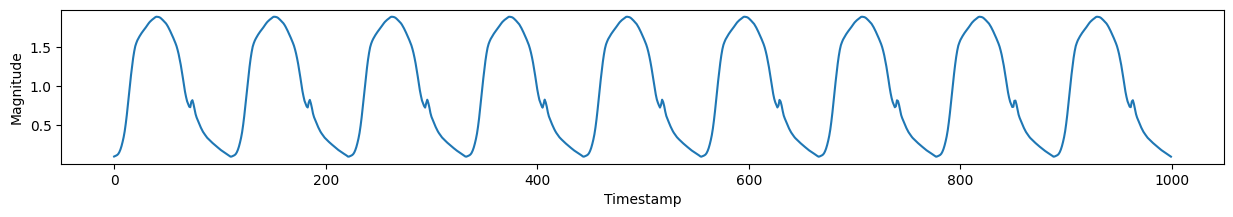

In [9]:
import numpy as np
import matplotlib.pyplot as plt

sig = np.load("./data/dataSV_all.npy")[0]
plt.figure(figsize=(15,2))
plt.plot(sig[:1000])
plt.xlabel("Timestamp")
plt.ylabel("Magnitude")
plt.show()

### Test whether the area is equal to SV label

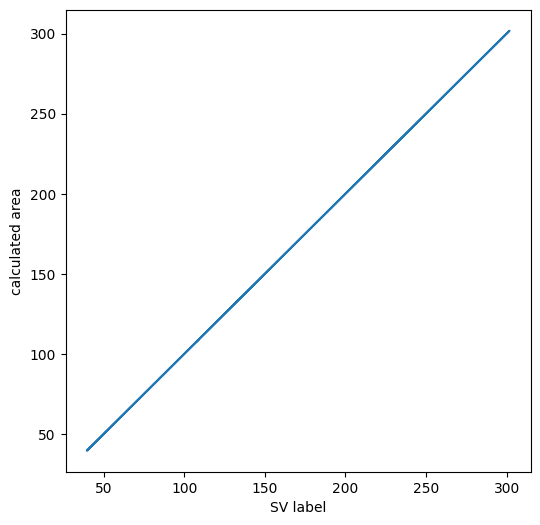

In [3]:
from utils import calculate_area
import numpy as np
import matplotlib.pyplot as plt

data_all = np.load("./data/dataSV_all.npy")
SV = data_all[:,-3]
cal_area = []
for i in range(SV.shape[0]):
    cal_area.append(calculate_area(data_all[i,:1000]))
plt.figure(figsize=(6,6))
plt.plot(SV,cal_area)
plt.ylabel('calculated area')
plt.xlabel('SV label')
plt.show()

### Test whether the equation 'MAP = SV * HR * TPR' is satisfied

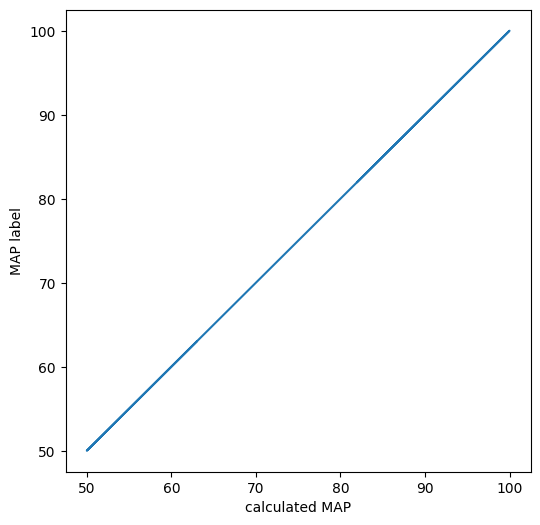

In [10]:
from utils import calculate_area
import numpy as np
import matplotlib.pyplot as plt

data_all = np.load("./data/dataSV_all.npy")
MAP = data_all[:,-1]
cal_area = []
for i in range(SV.shape[0]):
    cal_area.append(calculate_area(data_all[i,:1000]))
cal_MAP = np.array(cal_area) * data_all[:,-5] * data_all[:,-2] # SV * hr * TPR

plt.figure(figsize=(6,6))
plt.plot(cal_MAP,MAP)
plt.xlabel('calculated MAP')
plt.ylabel('MAP label')
plt.show()

### Comparison of ABP and Waveform
Due to the interpolation, the Waveform may have a slight difference to ABP

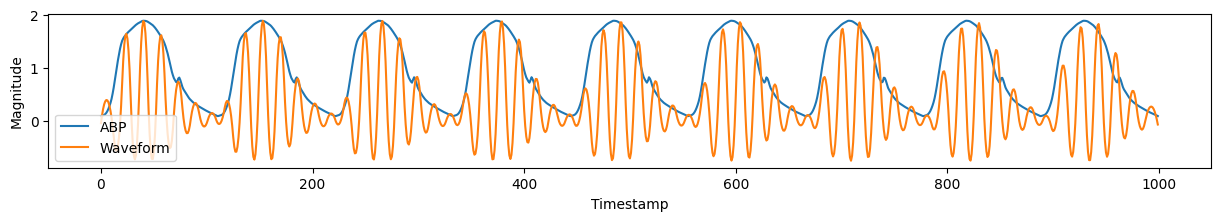

In [12]:
import numpy as np
import matplotlib.pyplot as plt


data_SV = np.load("./data/dataSV_all.npy")
data_WV = np.load("./data/dataWV_all.npy")
signal_SV = data_SV[0,:1000]
signal_WV = data_WV[0,:1000]

plt.figure(figsize=(15,2))
plt.plot(signal_SV,label="ABP")
plt.plot(signal_WV,label="Waveform")
plt.xlabel("Timestamp")
plt.ylabel("Magnitude")
plt.legend()
plt.show()

### Respiration effect

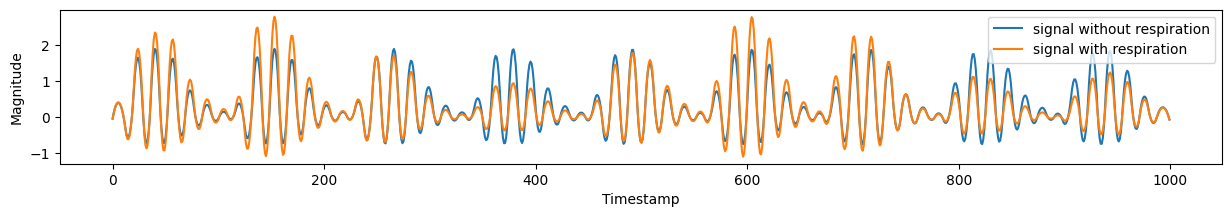

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from utils import add_respiration

dataWV_all = np.load('./data/dataWV_all.npy')
dataWV_all_rr = np.load('./data/dataWV_all_rr.npy')
sig = dataWV_all[0,:1000]
sig_rr = dataWV_all_rr[0,:1000]

plt.figure(figsize=(15,2))
plt.plot(sig,label="signal without respiration")
plt.plot(sig_rr,label="signal with respiration")
plt.xlabel("Timestamp")
plt.ylabel("Magnitude")
plt.legend()
plt.show()

### Add noise to the tail on test set

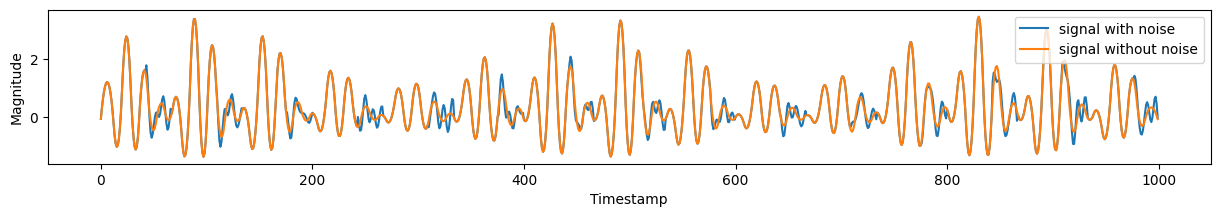

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from utils import white_noise

data_all_rr = np.load("./data/dataWV_all_rr.npy")
data_test_without_noise = data_all_rr[int(data_all_rr.shape[0]*0.8):]
data_test_with_noise = np.load('./data/data_test.npy')

plt.figure(figsize=(15,2))
plt.plot(data_test_with_noise[0,:1000],label="signal with noise")
plt.plot(data_test_without_noise[0,:1000],label="signal without noise")
plt.xlabel("Timestamp")
plt.ylabel("Magnitude")
plt.legend()
plt.show()